<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn 
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
# load the csv file
df_malaria = pd.read_csv('malaria.csv')

# display the first five observations
df_malaria.head()

Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0        2776.0            NaN            10030.0            NaN   
1        2775.0            NaN             9780.0            NaN   
2        2769.0         8166.0             9722.0            NaN   
3           NaN         8157.0                NaN            NaN   
4           NaN            NaN                NaN            NaN   

   Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  Deaths_Guinea  \
0            NaN                 NaN          NaN         NaN         1786.0   
1            NaN                 NaN          NaN         NaN         1781.0   
2            NaN                20.0          NaN         NaN         1767.0   
3            NaN                10.0          NaN         NaN            NaN   
4            NaN                 NaN          NaN         NaN            NaN   

   Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  Deaths_Senegal  \
0             NaN              2977.0             NaN             NaN   
1             NaN              2943.0             NaN             NaN   
2          3496.0              2915.0             NaN             NaN   
3          3496.0                 NaN             NaN             NaN   
4             NaN                 NaN             NaN             NaN   

   Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0                  NaN           NaN          NaN  
1                  NaN           NaN          NaN  
2                  3.0           NaN          NaN  
3                  8.0           NaN          NaN  
4                  NaN           NaN          NaN

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# isna() returns the boolean output
na_data = df_malaria.isna() 

# seperate the indicating values for each record 
# all() returns whether all elements are True over the given axis 
df = na_data.all(axis='columns') == True

# obtain a list of all records where indicating value is true 
df.index[df == True].tolist()

[4, 21, 39, 99]

We can use the final obtained list of indices to eliminate the empty records from the data. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# set the threshold value to filter the columns
# shape[0] returns number of rows for a dataframe
threshold = 0.6*df_malaria.shape[0]

# isnull() returns the boolean output as to whether the value is 'null' or not
# sum() returns the total number of missing values
null_values = df_malaria.isnull().sum()

# print the list of columns that exceed the threshold
col_list = list(null_values.index[null_values > threshold])
col_list

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

Since the isnull().sum() returns a pandas series we use index function to obtain a list of column names.
All the columns that exceed the threshold should ideally be eliminated from the data unless the columns are mentioned to be of significant importance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# combine the total records for the first four countries
df_obg = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]
df_obl = df_malaria[['Cases_Liberia', 'Deaths_Liberia']]
df_obsl = df_malaria[['Cases_SierraLeone', 'Deaths_SierraLeone']]
df_obnig = df_malaria[['Cases_Nigeria', 'Deaths_Nigeria']]

# print the total number of missing values 
print("Missing values for Guinea:"+ str(df_obg.isnull().sum().sum()))
print("Missing values for Liberia:"+ str(df_obl.isnull().sum().sum()))
print("Missing values for Sierra Leone:"+ str(df_obsl.isnull().sum().sum()))
print("Missing values for Nigeria:"+ str(df_obnig.isnull().sum().sum()))

Missing values for Guinea:69
Missing values for Liberia:90
Missing values for Sierra Leone:80
Missing values for Nigeria:178


Assuming the otherwise cost of recording is same for all the countries, the country that should be considered first must be Nigeria, because it has highest number of missing records from the list of countries that have considerable amount of data available.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

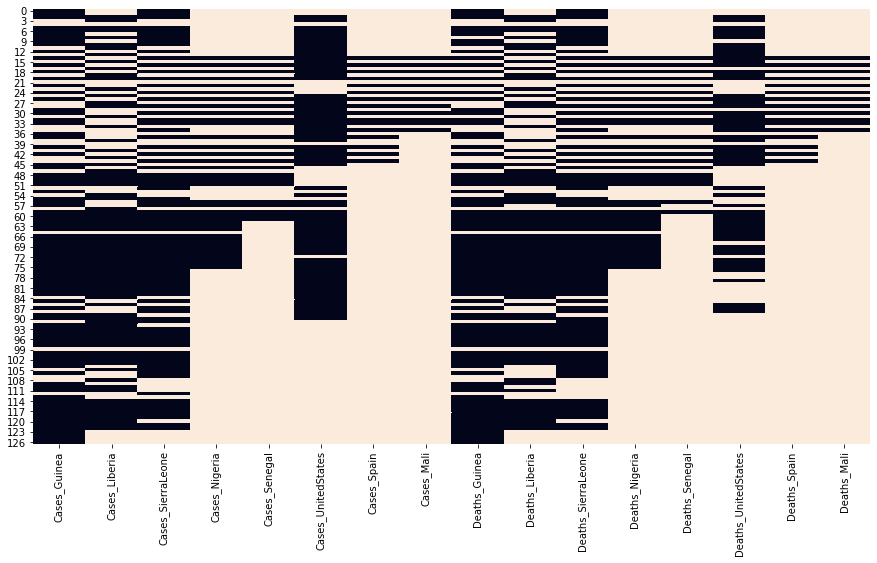

In [6]:
# set the figure size
plt.figure(figsize = (15,8))

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color bar or not
sns.heatmap(df_malaria.isnull(), cbar = False)

# display the plot
plt.show()

The above plot shows the missing data in each variable. The black color shows the non-null data.

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# check the shape of the dataframe
print("Shape of the data before elimination:", df_malaria.shape)

# use the dropna() to remove the rows 
df_malaria_updated = df_malaria.dropna(thresh = 3) 

# check the shape of the dataframe
print("Shape of the data after elimination:", df_malaria_updated.shape)

Shape of the data before elimination: (127, 16)
Shape of the data after elimination: (110, 16)


The threshold attribute is used to specify the number of least observations required to retain a record. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# drop the columns with missing values more than 60%
# use the list 'col_list' from Q2 to drop the columns
df_malaria.drop(col_list, axis = 1, inplace = True)

# check the retained columns with corresponding missing values
df_malaria.isnull().sum()

Cases_Guinea           34
Cases_Liberia          44
Cases_SierraLeone      40
Cases_UnitedStates     54
Deaths_Guinea          35
Deaths_Liberia         46
Deaths_SierraLeone     40
Deaths_UnitedStates    70
dtype: int64

Here 60% is assumed to be the threshold value (this value depends on the significance of column and may be decided by consulting the SME) for eliminating a column.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values before treatment: 44


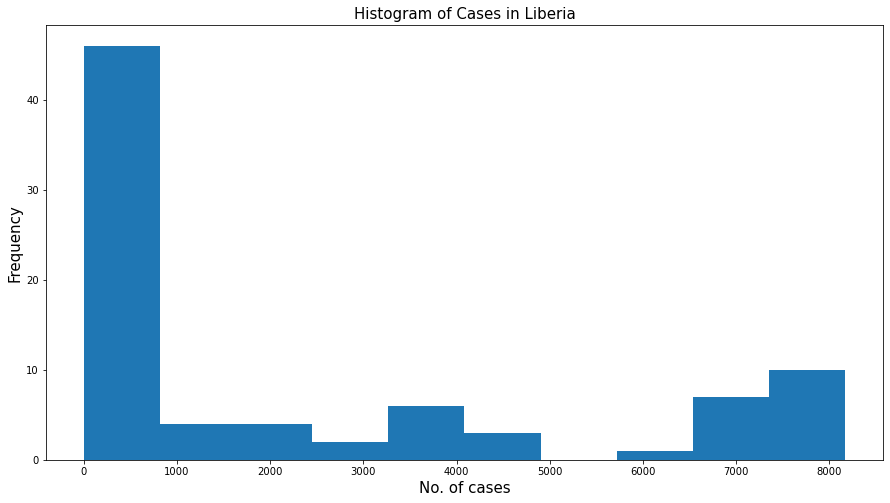

Null values after treatment: 0


In [9]:
# check the number of null values in the column 'Cases_Liberia'
print("Null values before treatment:", df_malaria['Cases_Liberia'].isnull().sum())

# set the figure size
plt.figure(figsize = (15,8))

# plot the histogram
plt.hist(x = df_malaria['Cases_Liberia'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Cases in Liberia', fontsize = 15)
plt.xlabel('No. of cases', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

# imputing with median value 
df_malaria['Cases_Liberia'] = df_malaria['Cases_Liberia'].fillna(df_malaria['Cases_Liberia'].median())

# check the null values after imputation
print("Null values after treatment:", df_malaria['Cases_Liberia'].isnull().sum())

Since initially, the values in the column 'Cases_Liberia' are imbalanced we can use the median value of the column to impute the missing observations.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

null values before treatment: 54


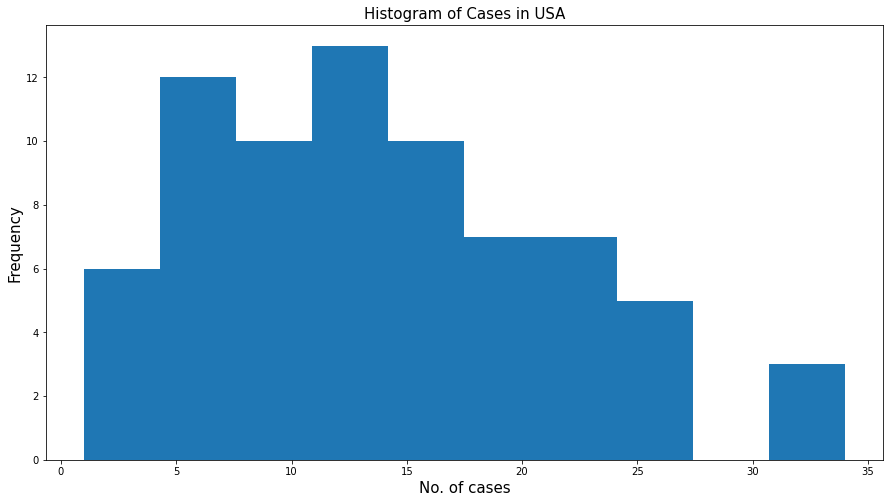

null values after treatment: 0


In [10]:
# check number of null values in column
print("null values before treatment:", df_malaria['Cases_UnitedStates'].isnull().sum())

# set the figure size
plt.figure(figsize = (15,8))

# plot the histogram
plt.hist(x = df_malaria['Cases_UnitedStates'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Cases in USA', fontsize = 15)
plt.xlabel('No. of cases', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

# Imputing with mean value 
df_malaria['Cases_UnitedStates'] = df_malaria['Cases_UnitedStates'].fillna(df_malaria['Cases_UnitedStates'].mean())

# display the result
print("null values after treatment:",df_malaria['Cases_UnitedStates'].isnull().sum())

Since initially, the values in the column 'Cases_UnitedStates' are balanced we can use the mean value of the column to impute the missing observations.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values:
 Cases_Guinea     34
Deaths_Guinea    35
dtype: int64


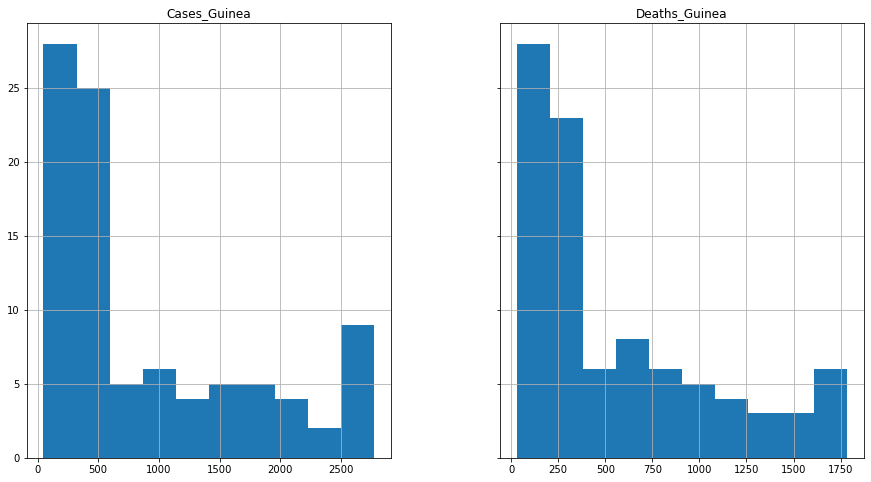

In [11]:
# combine the recorded observations for mentioned country
df_observations = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]

# missing values in the variables
print('Null values:\n', df_observations.isnull().sum())

# plot histogram
# 'sharey' shares the y-axis for all subplots
df_observations.hist(figsize = (15,8), sharey = True)

# display the plot
plt.show()

Plots reveal that both the variables considered are skewed (imbalanced).

In [12]:
# imputing with median value 
for col in df_observations:
    df_observations[col] = df_observations[col].fillna(df_observations[col].median())
    
# check the missing values    
print("Null values after treatment: \n", df_observations.isnull().sum())

Null values after treatment: 
 Cases_Guinea     0
Deaths_Guinea    0
dtype: int64


Since the data is imbalanced we have used the median as a strategy for imputation.

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [13]:
# load the csv file
df_house = pd.read_csv('house.csv')

# display the first five observations
df_house.head()

Rooms Type    Price Method             Regionname  Bathroom  Car  Landsize  \
0      3    h  1490000      S  Northern Metropolitan         1    1       126   
1      3    h  1220000      S  Northern Metropolitan         1    1       202   
2      3    h  1420000      S  Northern Metropolitan         1    0       156   
3      3    h  1515000      S   Western Metropolitan         2    1         0   
4      2    h   670000      S   Western Metropolitan         2    0       134   

   Distance  Bedroom  
0      25.2        2  
1      21.8        2  
2      21.7        2  
3      18.8        3  
4      20.6        3

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

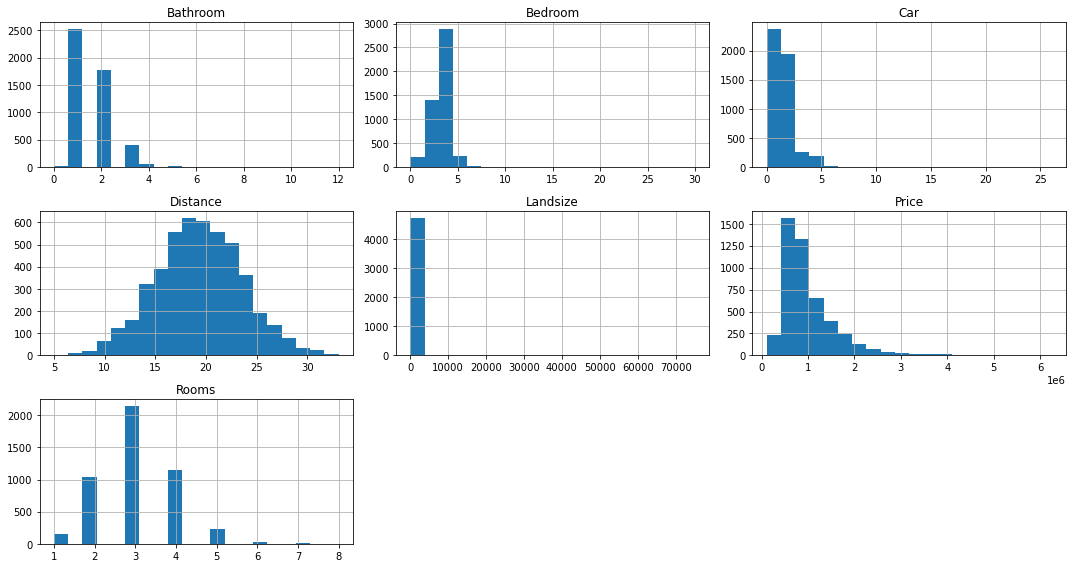

In [14]:
# plot histogram of all numeric variables
# set the number of bins to 20
# set the figure size using 'figsize'
df_house.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

Since the values of 'Landsize' are concentrated around limited range of values we may overlook the variable when considering outlier treatment.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

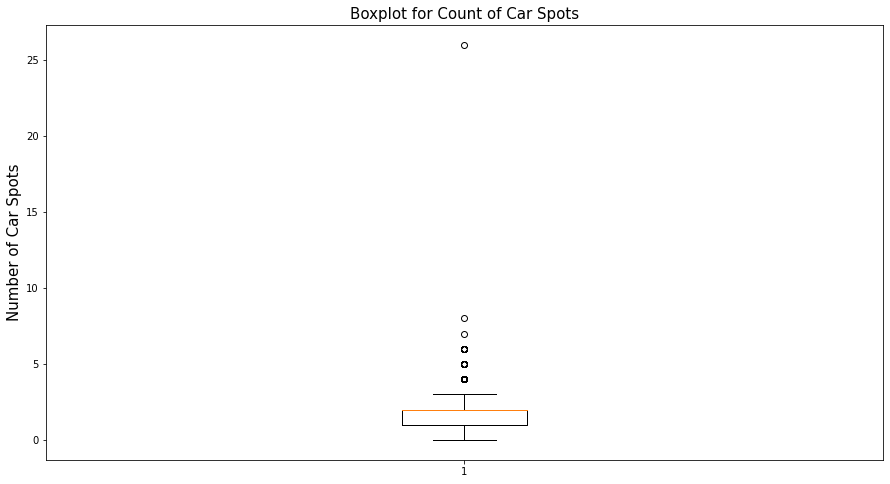

In [15]:
# set the figure size
plt.figure(figsize = (15,8))

# plot the boxplot for 'Car' to visualize the outliers
plt.boxplot(x = df_house['Car'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Boxplot for Count of Car Spots', fontsize = 15)
plt.ylabel('Number of Car Spots', fontsize = 15)

# display the plot
plt.show()

Majority of the observations from records have count of car spots concentrated from 0 to 3. All the values outside the range will be considered as outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

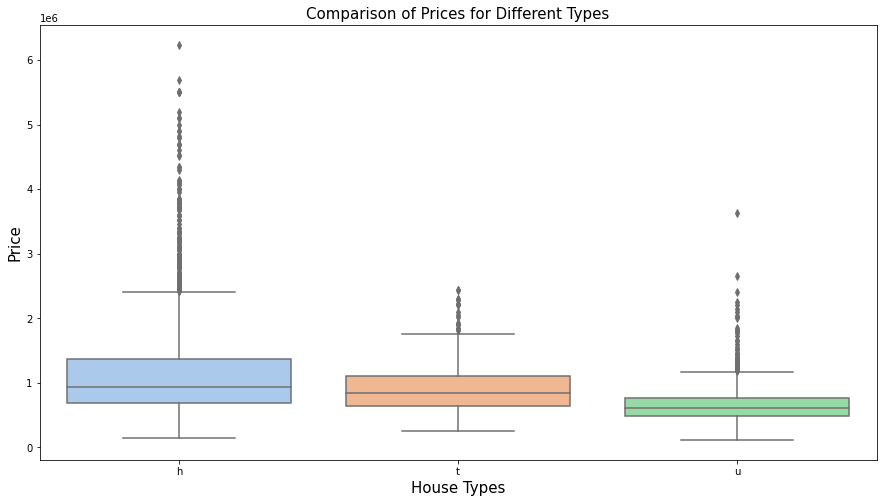

In [16]:
# set the figure size
plt.figure(figsize=(15,8))

# plot a boxplot to compare the prices of different house types
# 'palette' assigns colors to the plot
sns.boxplot(x = df_house['Type'], y = df_house['Price'] , palette='pastel')

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of Prices for Different Types', fontsize = 15)
plt.xlabel('House Types', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

# display the plot
plt.show()

From the above plot, we can observe that cottages, villas have a huge range of price values because this type of real estate is usually subject to more customization and hence affects the price and has more outliers. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the z-score method to find the extreme values in the variable 'Rooms'. Also, visualize the extreme points by plotting the histogram.

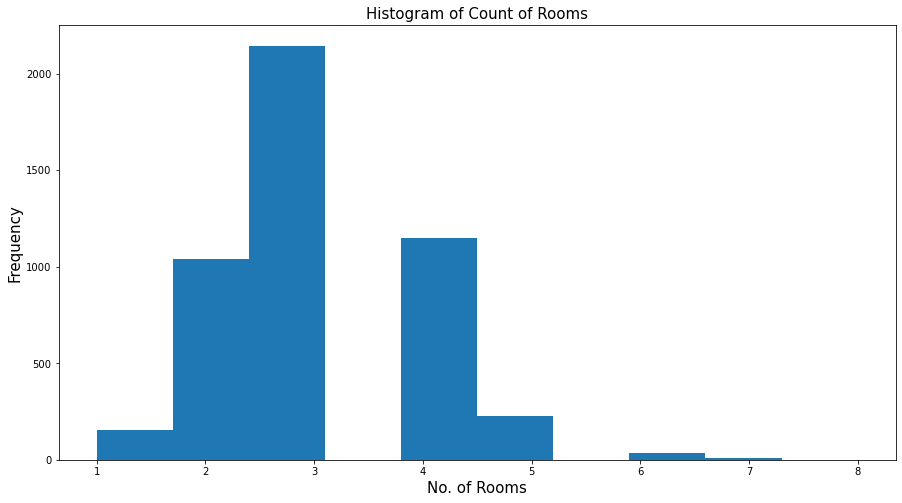

Outliers for 'Rooms' variable:
[7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6]


In [17]:
# set the figure size
plt.figure(figsize = (15,8))

# plot histogram of 'Rooms' to visualize the outliers 
plt.hist(x = df_house['Rooms'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Count of Rooms', fontsize = 15)
plt.xlabel('No. of Rooms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

# detect outliers using z-score
# define a funcion 
# create an empty list to store the outliers
# set the threshold to 3 as per z-score metric
# calculate mean and standard deviation
# calculate z_score using for loop
# append the observations to the list 'outliers'
outliers=[]
def detect_outlier(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# call the function to detect outliers
outlier_pt = detect_outlier(df_house.Rooms)
print("Outliers for 'Rooms' variable:\n" + str(outlier_pt))

Here, we can see that the 6 or 7 rooms are considered as extreme values.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

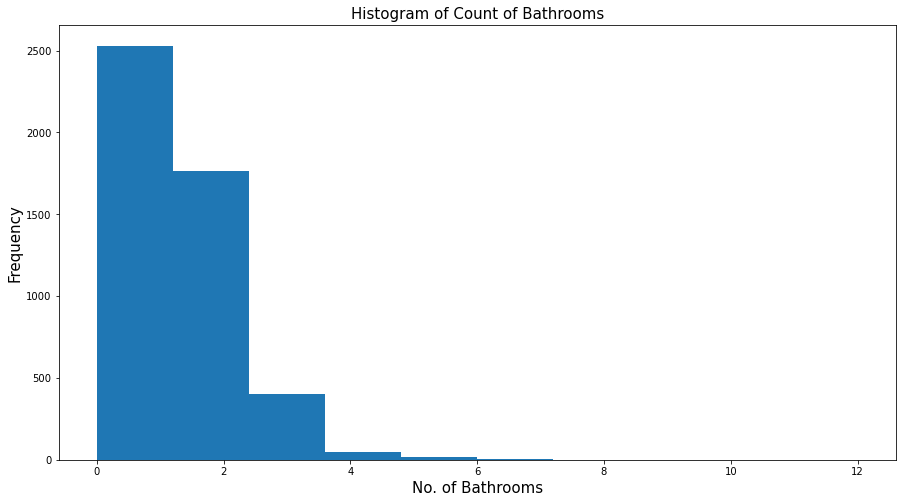

In [18]:
# set the figure size
plt.figure(figsize = (15,8))

# histogram of 'Bathroom' to visualize the outliers 
plt.hist(x = df_house['Bathroom'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Count of Bathrooms', fontsize = 15)
plt.xlabel('No. of Bathrooms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

From the plot we can see that the feature 'Bathroom' is skewed. Thus we can use the IQR method to determine the number of outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

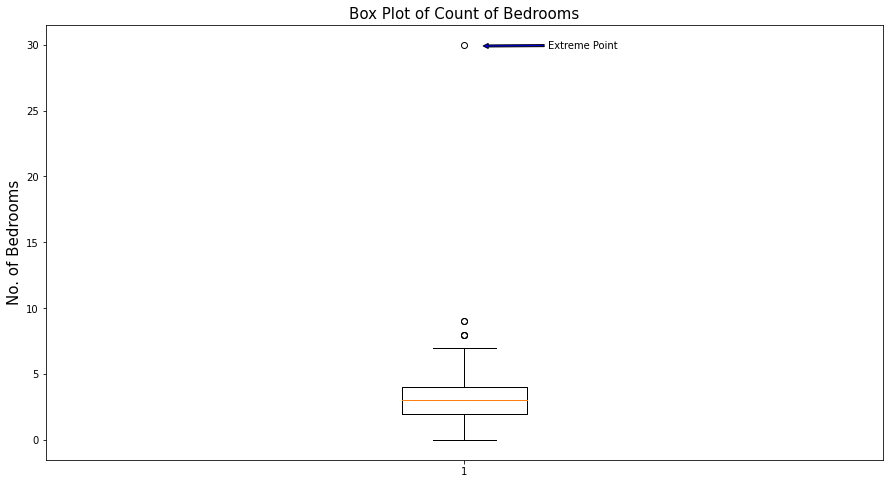

In [19]:
# set the figure size
plt.figure(figsize = (15,8))

# histogram of 'Bedroom' to visualize the extreme outliers 
plt.boxplot(x = df_house['Bedroom'])

# use 'annonate' to draw an arrow between points xy and xytext
# 's' represents the text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Extreme Point', xy=(1.02, 29.9), xytext=(1.1, 29.72), arrowprops=dict(facecolor='blue', arrowstyle = 'simple'))

# assign plot and axes labels
#set text size using 'fontsize'
plt.title('Box Plot of Count of Bedrooms', fontsize = 15)
plt.ylabel('No. of Bedrooms', fontsize = 15)

# display the plot
plt.show()

The plot shows the presence of an extreme outlier. Now, use IQR method to find the corresponding record in the data.

In [20]:
# calculate the first quartile
Q1 = df_house['Bedroom'].quantile(0.25)

#calculate the third quartile
Q3 = df_house['Bedroom'].quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# extract the observation 
df_house[df_house['Bedroom'] > Q3 + 3*IQR]

Rooms Type   Price Method            Regionname  Bathroom  Car  \
1937      3    h  496000      S  Western Metropolitan         1    1   

      Landsize  Distance  Bedroom  
1937         0      21.7       30

Since we are interested in extracting the exterme point, we consider the observations beyond (Q3 + 3 * IQR).

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

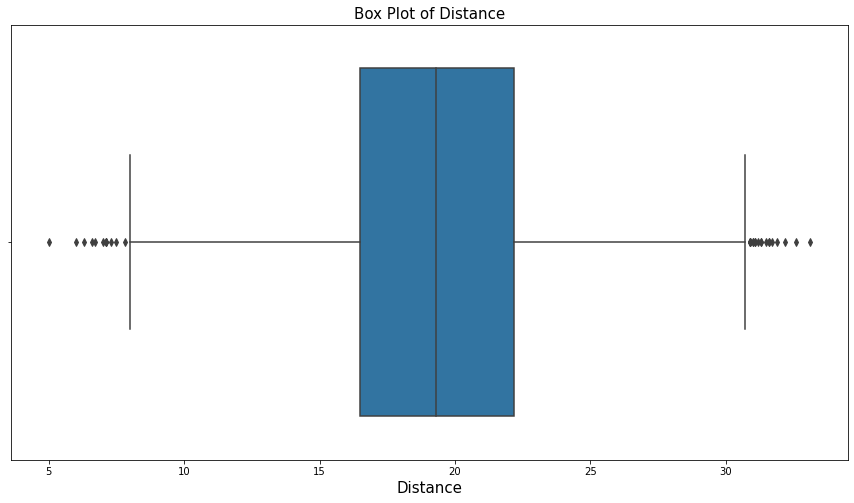

In [21]:
# set the figure size
plt.figure(figsize = (15,8))

# box plot to check the presence of outliers
sns.boxplot(x = df_house['Distance'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Box Plot of Distance', fontsize = 15)
plt.xlabel('Distance', fontsize = 15)

# display the plot 
plt.show()

The boxplot shows the presence of outliers below and above the whiskers. Use the IQR method to remove the outliers.

In [22]:
# check the average distance before removing the outliers
print('Original Average distance:', df_house['Distance'].mean())

# calculate the first quartile
Q1 = df_house['Distance'].quantile(0.25)

#calculate the third quartile
Q3 = df_house['Distance'].quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the variable
df_house_updated = df_house[~((df_house['Distance'] < (Q1 - 1.5 * IQR)) | (df_house['Distance'] > (Q3 + 1.5 * IQR)))]

# check the average distance after removing the outliers
print('Updated Average distance:', df_house_updated['Distance'].mean())

Original Average distance: 19.32834662190515
Updated Average distance: 19.311425554382247


We can see that after eliminating the outlier values, there is no significant difference in the average distance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

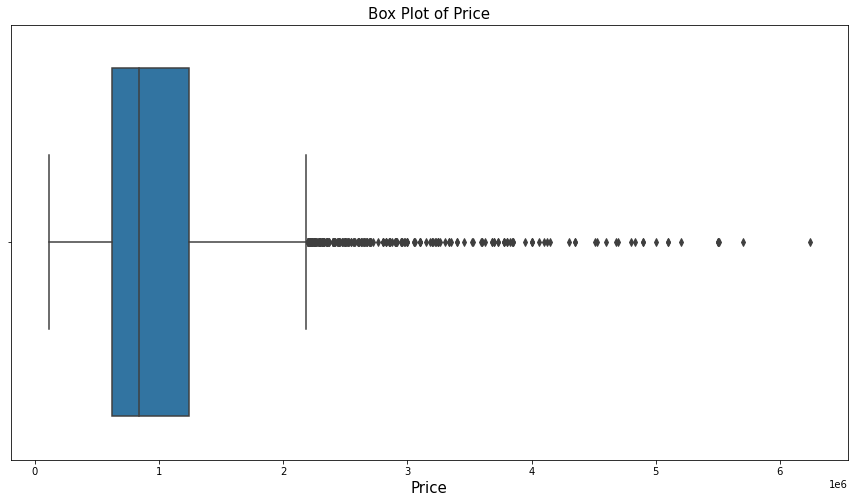

In [23]:
# set the figure size
plt.figure(figsize = (15,8))

# box  plot to check the presence of outliers
sns.boxplot(x = df_house['Price'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Box Plot of Price', fontsize = 15)
plt.xlabel('Price', fontsize = 15)

# display the plot 
plt.show()

We can consider the house price greater than 5000000, as the extreme prices.

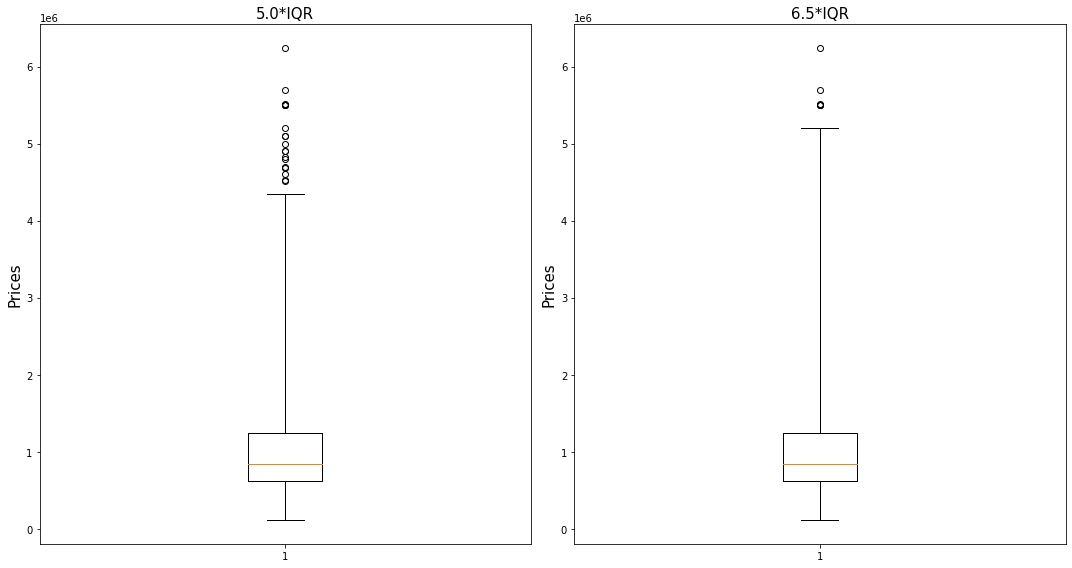

In [24]:
# set the figure size
plt.figure(figsize = (15,8))

# plot the boxplots with different whisker range
# create the subplots of boxplot
# 'whis' determines the reach of the whisker 
plt.subplot(1,2,1)
plt.boxplot(x = df_house['Price'], whis = 5.0)
plt.title('5.0*IQR', fontsize = 15)
plt.ylabel('Prices', fontsize = 15)

plt.subplot(1,2,2)
plt.boxplot(x = df_house['Price'], whis = 6.5)
plt.title('6.5*IQR', fontsize = 15)
plt.ylabel('Prices', fontsize = 15)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

To consider only the extreme prices, we need to use range (6.5 times IQR).

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# check the summary statistics of distance
df_house['Distance'].describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

Here, the minimum distance is 5 units and maximum distance is approximately 33 units. Create a new feature containing the three different distance ranges.

In [26]:
# assign a name to the column
dist = df_house['Distance']

# define a function to create new levels
# use 'if' statement to pass the conditions
def new_feat(dist):

    if (dist >= 5.0) & (dist < 15.0):
        return 'walking_distance'
    if (dist >= 15.0) & (dist < 25.0):
        return 'close_by'
    if (dist > 25.0):
        return 'far_away'
    
# apply the function to create a new column
df_house['Distance_level']= df_house['Distance'].apply(new_feat)

In [27]:
# display the first five observations
df_house.head()

Rooms Type    Price Method             Regionname  Bathroom  Car  Landsize  \
0      3    h  1490000      S  Northern Metropolitan         1    1       126   
1      3    h  1220000      S  Northern Metropolitan         1    1       202   
2      3    h  1420000      S  Northern Metropolitan         1    0       156   
3      3    h  1515000      S   Western Metropolitan         2    1         0   
4      2    h   670000      S   Western Metropolitan         2    0       134   

   Distance  Bedroom Distance_level  
0      25.2        2       far_away  
1      21.8        2       close_by  
2      21.7        2       close_by  
3      18.8        3       close_by  
4      20.6        3       close_by

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

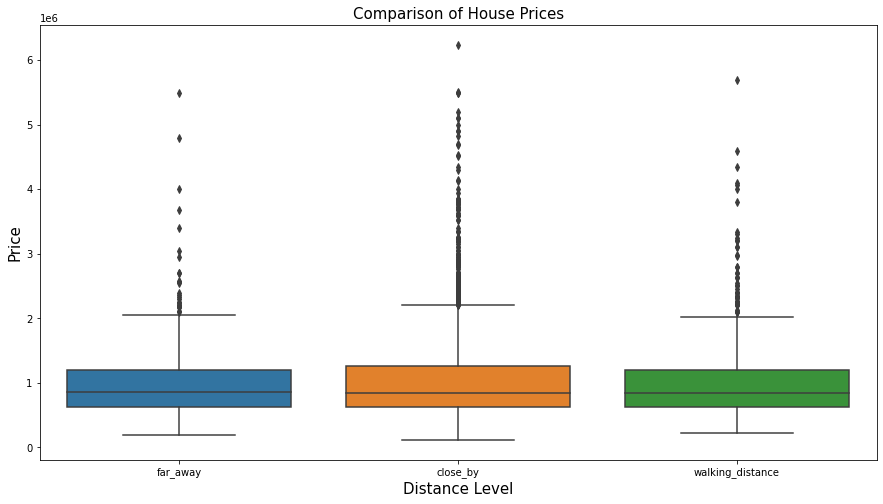

In [28]:
# set the figure size
plt.figure(figsize = (15,8))

# plot a boxplot to compare the house prices
# pass distance levels to the parameter, 'hue'
sns.boxplot(x = df_house['Distance_level'], y = df_house['Price'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of House Prices', fontsize = 15)
plt.xlabel('Distance Level', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

# display the plot
plt.show()

The distance of the house from CBD is not affecting the price. The houses that are in the distance range of 15-25 units from CBD have the highest number of outliers.

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# split the variable into two subsets
# import 'train_test_split' from sklearn
from sklearn.model_selection import train_test_split

# set the 'random_state' to generate the same data for every implementation of the code
# 'test_size' returns the 20% of the data in one dataset and 80% in another
price_train, price_test = train_test_split(df_house['Price'], test_size = 0.20, random_state = 0)

# print the shape of train and test sets
print("price_train",price_train.shape)
print("price_test",price_test.shape)

price_train (3812,)
price_test (954,)


The data representing the house prices is split into two sets.